In [31]:
# Importação das biblíotecas relevantes para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# URL do arquivo CSV
filePath = 'https://raw.githubusercontent.com/fdrigui/BootcampDataScience/main/module_one/dados/A225356189_28_143_208(atend).csv'

# Abre arquivo
df_atend = pd.read_csv(filePath, sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=12, na_values='-')
df_atend.columns = df_atend.columns.str.replace('/', '-')
df_atend = df_atend.rename(columns={'Unidade da Federação':'uf_code_and_name'})
df_atend[['uf_code', 'uf_name']] = df_atend['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
df_atend = df_atend.dropna(axis=1, how='any')
df_atend.head()

,uf_code_and_name,2007-Ago,2007-Set,2007-Out,2007-Nov,2007-Dez,2008-Jan,2008-Fev,2008-Mar,2008-Abr,...,2020-Set,2020-Out,2020-Nov,2020-Dez,2021-Jan,2021-Fev,2021-Mar,Total,uf_code,uf_name
0,11 Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81",...,"8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",11,Rondônia
1,12 Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69",...,"3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",12,Acre
2,13 Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49",...,"18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",13,Amazonas
3,14 Roraima,"4,785.91","11,858.63","43,852.67","369,328.51","470,676.43","808,448.39","771,687.83","876,091.18","896,952.53",...,"2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",14,Roraima
4,15 Pará,"181,159.29","433,414.74","1,893,197.50","5,105,406.44","13,162,823.43","21,762,104.16","20,126,081.01","22,149,375.82","23,436,682.75",...,"36,965,951.76","38,406,616.21","37,043,032.10","36,914,437.92","33,887,773.65","23,343,222.94","13,069,564.31","4,705,309,002.29",15,Pará


In [3]:
# Cria lista na mão dos códigos UF e os UFs
uf_number_code = pd.DataFrame({"uf_code":["11", "12", "13", "14", "15", "16", "17", "21", "22", "23", "24", "25", "26", "27",
                                          "28", "29", "31", "32", "33", "35", "41", "42", "43", "50", "51", "52", "53"],
                               "uf":["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL",
                                       "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"]})
df_atend['uf'] = df_atend['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
df_atend['uf_i'] = df_atend['uf']
df_atend = df_atend.set_index('uf_i')
df_atend['2008-Jan'] = df_atend['2008-Fev']
df_atend.head()

,uf_code_and_name,2007-Ago,2007-Set,2007-Out,2007-Nov,2007-Dez,2008-Jan,2008-Fev,2008-Mar,2008-Abr,...,2020-Out,2020-Nov,2020-Dez,2021-Jan,2021-Fev,2021-Mar,Total,uf_code,uf_name,uf
uf_i,,,,,,,,,,,,,,,,,,,,,
RO,11 Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,940,792.63","1,940,792.63","1,955,721.68","2,143,353.81",...,"8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04","996,411,254.68",11,Rondônia,RO
AC,12 Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,743,978.66","1,743,978.66","2,057,439.02","2,057,829.69",...,"3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65","450,048,530.47",12,Acre,AC
AM,13 Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","7,934,652.10","7,934,652.10","8,641,517.13","8,531,576.49",...,"18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80","1,917,247,936.05",13,Amazonas,AM
RR,14 Roraima,"4,785.91","11,858.63","43,852.67","369,328.51","470,676.43","771,687.83","771,687.83","876,091.18","896,952.53",...,"3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31","328,876,965.09",14,Roraima,RR
PA,15 Pará,"181,159.29","433,414.74","1,893,197.50","5,105,406.44","13,162,823.43","20,126,081.01","20,126,081.01","22,149,375.82","23,436,682.75",...,"38,406,616.21","37,043,032.10","36,914,437.92","33,887,773.65","23,343,222.94","13,069,564.31","4,705,309,002.29",15,Pará,PA


In [4]:
df_atend_1 = df_atend.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf', 'uf_name'], axis=1)

In [5]:
usaveis = df_atend_1.T.loc['2008-Jan':'2019-Dez', :].copy()
usaveis.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
2008-Jan,"1,940,792.63","1,743,978.66","7,934,652.10","771,687.83","20,126,081.01","1,275,063.72","5,051,932.07","13,452,263.93","9,711,680.20","27,643,304.86",...,"10,032,886.43","44,128,159.73","172,961,999.58","48,855,046.46","24,409,572.92","45,897,704.82","8,279,288.79","7,929,894.93","18,149,374.27","10,215,956.80"
2008-Fev,"1,940,792.63","1,743,978.66","7,934,652.10","771,687.83","20,126,081.01","1,275,063.72","5,051,932.07","13,452,263.93","9,711,680.20","27,643,304.86",...,"10,032,886.43","44,128,159.73","172,961,999.58","48,855,046.46","24,409,572.92","45,897,704.82","8,279,288.79","7,929,894.93","18,149,374.27","10,215,956.80"
2008-Mar,"1,955,721.68","2,057,439.02","8,641,517.13","876,091.18","22,149,375.82","1,177,745.93","5,200,151.87","14,750,895.33","10,428,191.09","30,085,370.22",...,"12,262,049.08","42,900,847.02","170,556,696.16","55,611,791.07","27,483,480.50","52,928,695.92","9,793,888.78","9,416,367.68","20,992,213.03","11,627,918.26"
2008-Abr,"2,143,353.81","2,057,829.69","8,531,576.49","896,952.53","23,436,682.75","1,396,371.51","5,343,714.73","15,148,647.11","10,227,943.00","31,376,221.00",...,"12,453,466.98","45,306,499.53","170,338,163.23","56,115,135.82","27,806,641.44","51,972,416.77","8,997,542.75","9,390,588.03","21,049,477.30","11,922,015.36"
2008-Mai,"2,280,382.58","2,226,577.93","9,079,902.15","1,027,288.73","23,861,080.80","1,411,520.77","5,344,487.99","14,543,679.92","10,562,148.66","31,189,904.62",...,"11,789,786.09","43,951,349.46","172,462,057.87","55,574,831.93","28,354,279.52","51,679,350.79","9,842,108.59","9,378,197.25","19,162,546.79","11,900,817.00"


<AxesSubplot:>

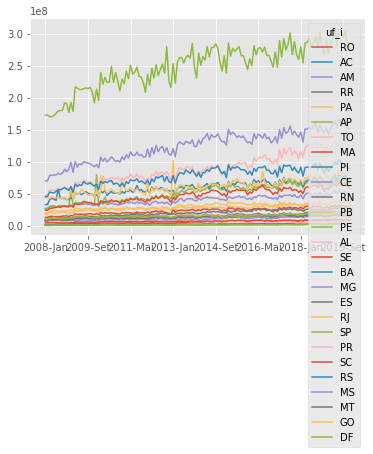

In [7]:
pop = pd.read_csv('dados/pop.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
pop = pop.set_index('Ano')
pop = pop.drop('Total', axis=1)
pop.tail()

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
Ano,,,,,,,,,,,,,,,,,,,,,
2015,1768204,803513,3938336,505665,8206923,766679,1515126,6904241,3204028,8904459,...,3929911,16550024,44396484,11163018,6819190,11247972,2651235,3265486,6610681,2914830
2016,1787279,816687,4001667,514229,8305359,782295,1532902,6954036,3212180,8963663,...,3973697,16635996,44749699,11242720,6910553,11286500,2682386,3305531,6695855,2977216
2017,1805788,829619,4063614,522636,8366628,797722,1550194,7000229,3219257,9020460,...,4016356,16718956,45094866,11320892,7001161,11322895,2713147,3344544,6778772,3039444
2018,1757589,869265,4080611,576568,8513497,829494,1555229,7035055,3264531,9075649,...,3972388,17159960,45538936,11348937,7075494,11329605,2748023,3441998,6921161,2974703
2019,1777225,881935,4144597,605761,8602865,845731,1572866,7075181,3273227,9132078,...,4018650,17264943,45919049,11433957,7164788,11377239,2778986,3484466,7018354,3015268


<AxesSubplot:>

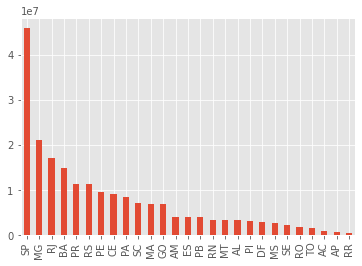

In [53]:
pop.loc[2019].sort_values(ascending=False).plot(kind='bar')

In [8]:
usaveis[['ano', 'mes']] = usaveis.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})

<AxesSubplot:xlabel='uf_i'>

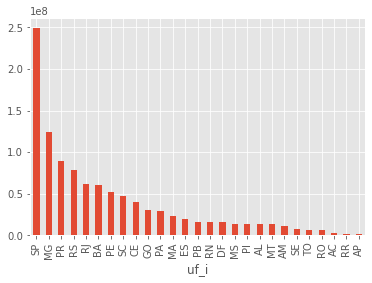

In [44]:
usaveis.set_index('ano').loc[:,'RO':'DF'].groupby('ano').mean().mean(axis=0).sort_values(ascending=False).plot(kind='bar')

In [9]:

usaveis[usaveis['ano']=='2008'].loc[:,'RO':'DF'].div(pop.loc[2008], axis=1)

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
2008-Jan,1.30,2.56,2.37,1.87,2.75,2.08,3.95,2.13,3.11,3.27,...,2.91,2.78,4.22,4.61,4.03,4.23,3.54,2.68,3.11,4.00
2008-Fev,1.30,2.56,2.37,1.87,2.75,2.08,3.95,2.13,3.11,3.27,...,2.91,2.78,4.22,4.61,4.03,4.23,3.54,2.68,3.11,4.00
2008-Mar,1.31,3.03,2.59,2.12,3.03,1.92,4.06,2.34,3.34,3.56,...,3.55,2.70,4.16,5.25,4.54,4.88,4.19,3.18,3.59,4.55
2008-Abr,1.44,3.03,2.55,2.17,3.20,2.28,4.17,2.40,3.28,3.71,...,3.61,2.85,4.15,5.30,4.59,4.79,3.85,3.17,3.60,4.66
2008-Mai,1.53,3.27,2.72,2.49,3.26,2.30,4.17,2.31,3.39,3.69,...,3.41,2.77,4.21,5.25,4.68,4.76,4.21,3.17,3.28,4.65
2008-Jun,1.76,3.11,2.59,2.27,3.21,2.32,4.22,2.31,3.35,3.49,...,3.44,2.78,4.28,5.30,4.79,4.95,4.39,3.20,3.48,4.68
2008-Jul,1.99,2.98,2.62,2.43,3.08,2.23,3.95,2.31,3.40,3.59,...,3.53,2.79,4.38,5.65,4.96,5.19,4.35,3.31,3.43,4.42
2008-Ago,1.97,2.77,2.49,2.53,3.18,2.53,4.07,2.32,3.41,3.47,...,3.59,2.68,4.39,5.35,4.77,5.18,4.11,3.04,3.60,4.52
2008-Set,1.90,3.07,2.44,2.43,3.23,2.53,4.06,2.43,3.54,3.60,...,3.62,2.71,4.39,5.49,5.08,5.33,4.40,2.99,3.66,4.86
2008-Out,1.93,3.28,2.30,2.56,3.19,2.67,4.70,2.48,3.57,3.76,...,3.72,2.81,4.68,5.79,5.17,5.49,4.63,3.12,3.53,4.86


In [10]:
valor_pop = pd.DataFrame(columns=usaveis.columns[:-2])
for ano in usaveis['ano'].unique():
    valor_pop = valor_pop.append(usaveis[usaveis['ano']==ano].loc[:,'RO':'DF'].div(pop.loc[int(ano)], axis=1))

<AxesSubplot:>

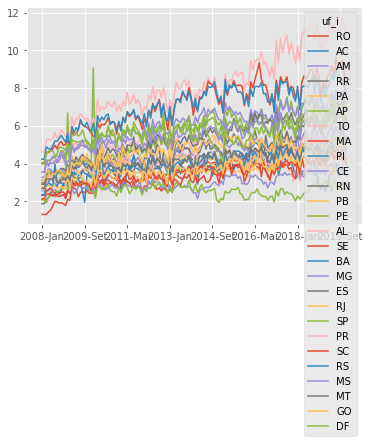

In [11]:
valor_pop.plot()

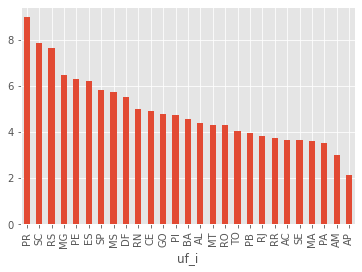

In [57]:
usaveis.groupby('ano').mean().div(pop.loc[int(ano)], axis=1).loc['2016'].sort_values(ascending=False).plot(kind='bar')
plt.show()

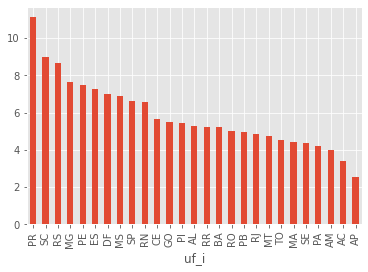

In [60]:
valor_pop.loc['2019-Ago'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [71]:
ahi = pd.read_csv('dados/AIH_aprovadas.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
ahi.columns = ahi.columns.str.replace('/', '-')
ahi = ahi.rename(columns={'Unidade da Federação':'uf_code_and_name'})
ahi[['uf_code', 'uf_name']] = ahi['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
ahi = ahi.dropna(axis=1, how='any')
ahi['uf'] = ahi['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
ahi['uf_i'] = ahi['uf']
ahi = ahi.set_index('uf_i')
ahi['2008-Jan'] = ahi['2008-Fev']
ahi_1 = ahi.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
ahi_t = ahi_1.T.loc['2008-Jan':'2019-Dez', :].copy()
ahi_t = ahi_t.drop('Total', axis=1)
ahi_t[['ano', 'mes']] = ahi_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})
ahi_t.tail()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,SP,PR,SC,RS,MS,MT,GO,DF,ano,mes
2019-Ago,9942,3872,17190,4084,40637,3147,7165,38642,19078,44416,...,220281,75807,42895,68249,14947,16902,29651,20452,2019,Ago
2019-Set,10147,3989,16336,3956,41054,3494,7159,38415,19040,44181,...,214285,74960,43085,64638,14819,16770,29230,19985,2019,Set
2019-Out,10367,4114,16995,4199,42402,3476,7229,39408,20284,45941,...,223607,77495,45413,66948,14941,17374,30096,20292,2019,Out
2019-Nov,10365,3654,16072,3925,40457,3298,7420,38329,18485,42650,...,205872,72990,41861,62077,14526,15831,28052,17891,2019,Nov
2019-Dez,9861,3622,15462,3551,39009,3013,7480,36881,17797,41432,...,196754,68866,39173,59873,14107,14616,27381,17454,2019,Dez


<AxesSubplot:xlabel='ano'>

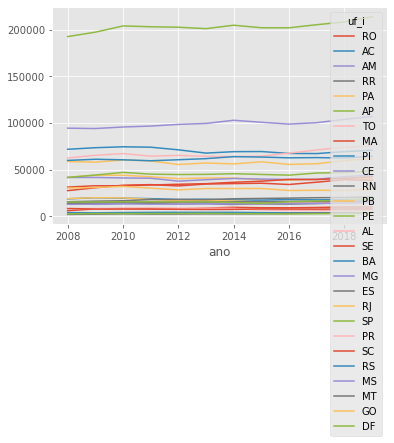

In [61]:
ahi_t.groupby('ano').mean().plot()

<AxesSubplot:xlabel='ano'>

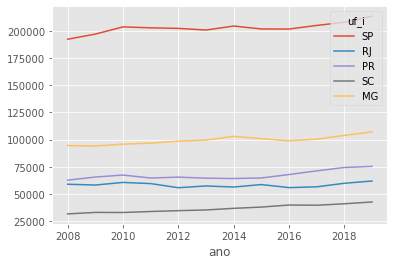

In [66]:
ahi_t.groupby('ano').mean()[['SP', 'RJ', 'PR', 'SC', 'MG']].plot()

<AxesSubplot:xlabel='uf_i'>

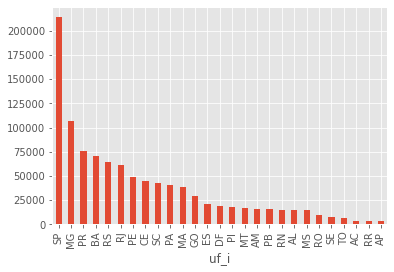

In [70]:
ahi_t.groupby('ano').mean().loc['2019'].sort_values(ascending=False).plot(kind='bar')

In [16]:
valor_ahi = usaveis.loc[:,'RO':'ano'].groupby('ano').sum().div(ahi_t.groupby('ano').sum(), axis=1)
valor_ahi.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
ano,,,,,,,,,,,,,,,,,,,,,
2008,408.01,499.87,598.21,466.52,542.40,527.53,639.44,532.00,554.81,719.11,...,762.68,741.50,923.52,898.25,908.95,896.80,748.97,621.48,659.20,757.33
2009,456.82,561.04,686.39,586.62,602.29,574.26,753.07,585.23,621.26,800.15,...,876.26,871.86,"1,051.53","1,010.91","1,061.92","1,037.53",844.91,751.96,757.19,895.63
2010,528.90,591.12,705.43,640.31,611.43,570.15,761.60,589.90,623.18,827.76,...,932.19,909.13,"1,102.46","1,074.95","1,138.89","1,093.86",884.90,789.72,786.98,898.06
2011,548.84,638.66,732.67,637.71,637.97,585.46,774.85,599.30,657.37,873.02,...,948.73,950.21,"1,146.93","1,173.46","1,190.95","1,150.90",947.58,812.66,895.29,940.76
2012,546.02,643.63,750.74,660.28,647.02,607.81,820.35,654.35,697.06,945.63,...,"1,010.94","1,003.94","1,182.84","1,212.36","1,240.71","1,192.62","1,007.36",812.73,980.71,957.87


<AxesSubplot:xlabel='ano'>

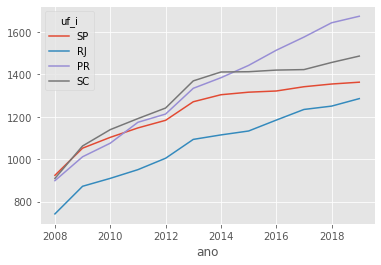

In [17]:
valor_ahi[['SP', 'RJ', 'PR', 'SC']].plot()

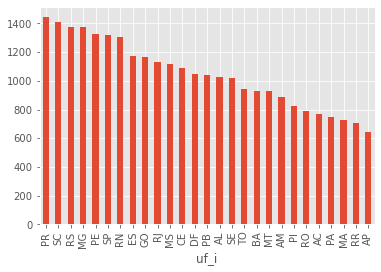

In [55]:
valor_ahi.loc['2015'].sort_values(ascending=False).plot(kind='bar')
plt.savefig('plot.png')

In [19]:
hserv = pd.read_csv('dados/h_serv.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
hserv.columns = hserv.columns.str.replace('/', '-')
hserv = hserv.rename(columns={'Unidade da Federação':'uf_code_and_name'})
hserv[['uf_code', 'uf_name']] = hserv['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
hserv = hserv.dropna(axis=1, how='any')
hserv['uf'] = hserv['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
hserv['uf_i'] = hserv['uf']
hserv = hserv.set_index('uf_i')
hserv['2008-Jan'] = hserv['2008-Fev']
hserv_1 = hserv.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
hserv_t = hserv_1.T.loc['2008-Jan':'2019-Dez', :].copy()
hserv_t = hserv_t.drop('Total', axis=1)
hserv_t[['ano', 'mes']] = hserv_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})
hserv_t.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,SP,PR,SC,RS,MS,MT,GO,DF,ano,mes
2008-Jan,"1,508,433.27","1,328,906.03","6,091,900.71","553,109.78","15,560,635.68","948,849.37","4,051,196.79","10,466,630.82","7,649,607.64","21,922,146.54",...,"142,799,860.02","39,918,589.70","19,823,465.66","37,691,653.50","6,545,391.61","6,292,297.90","14,824,874.78","8,042,348.03",2008,Jan
2008-Fev,"1,508,433.27","1,328,906.03","6,091,900.71","553,109.78","15,560,635.68","948,849.37","4,051,196.79","10,466,630.82","7,649,607.64","21,922,146.54",...,"142,799,860.02","39,918,589.70","19,823,465.66","37,691,653.50","6,545,391.61","6,292,297.90","14,824,874.78","8,042,348.03",2008,Fev
2008-Mar,"1,529,217.11","1,571,136.85","6,614,473.57","628,660.51","16,980,286.90","863,481.65","4,097,676.42","11,398,889.44","8,194,292.35","23,800,479.60",...,"138,491,473.46","45,443,777.25","22,368,847.21","43,494,822.82","7,769,555.51","7,479,587.02","17,163,023.44","9,160,189.71",2008,Mar
2008-Abr,"1,684,669.55","1,574,980.69","6,549,705.70","648,511.02","18,062,928.85","1,037,201.99","4,198,413.39","11,680,866.14","8,023,309.47","24,798,983.57",...,"138,306,195.02","45,885,506.03","22,643,169.23","42,808,642.68","7,145,229.87","7,467,467.57","17,169,303.69","9,455,369.68",2008,Abr
2008-Mai,"1,812,552.35","1,701,820.87","7,008,455.92","740,488.42","18,442,410.20","1,037,976.38","4,185,265.13","11,166,295.87","8,254,524.89","24,646,786.53",...,"140,345,314.78","45,447,815.74","23,086,810.84","42,582,365.31","7,834,923.98","7,435,597.37","15,629,514.15","9,434,607.43",2008,Mai


<AxesSubplot:>

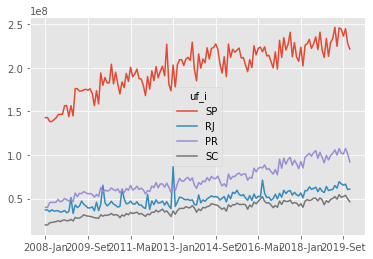

In [20]:
hserv_t[['SP', 'RJ', 'PR', 'SC']].plot()

In [21]:
hserv_ahi = hserv_t.loc[:,'RO':'ano'].groupby('ano').sum().div(ahi_t.groupby('ano').sum(), axis=1)

<AxesSubplot:xlabel='ano'>

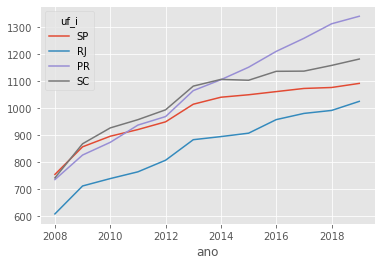

In [22]:
hserv_ahi[['SP', 'RJ', 'PR', 'SC']].plot()

<AxesSubplot:xlabel='uf_i'>

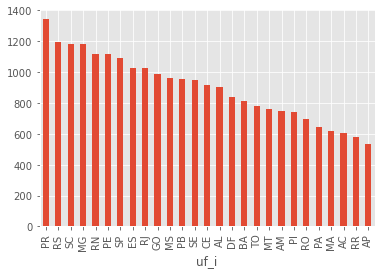

In [77]:
hserv_ahi.loc['2019'].sort_values(ascending=False).plot(kind='bar')

In [24]:
pserv = pd.read_csv('dados/prof_serv.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
pserv.columns = pserv.columns.str.replace('/', '-')
pserv = pserv.rename(columns={'Unidade da Federação':'uf_code_and_name'})
pserv[['uf_code', 'uf_name']] = pserv['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
pserv = pserv.dropna(axis=1, how='any')
pserv['uf'] = pserv['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
pserv['uf_i'] = pserv['uf']
pserv = pserv.set_index('uf_i')
pserv['2008-Jan'] = pserv['2008-Fev']
pserv_1 = pserv.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
pserv_t = pserv_1.T.loc['2008-Jan':'2019-Dez', :].copy()
pserv_t = pserv_t.drop('Total', axis=1)
pserv_t[['ano', 'mes']] = pserv_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})
pserv_t.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,SP,PR,SC,RS,MS,MT,GO,DF,ano,mes
2008-Jan,"432,359.36","415,072.63","1,842,751.39","218,578.05","4,565,445.33","326,214.35","1,000,735.28","2,985,633.11","2,062,072.56","5,721,158.32",...,"30,162,139.56","8,936,456.76","4,586,107.26","8,206,051.32","1,733,897.18","1,637,597.03","3,324,499.49","2,173,608.77",2008,Jan
2008-Fev,"432,359.36","415,072.63","1,842,751.39","218,578.05","4,565,445.33","326,214.35","1,000,735.28","2,985,633.11","2,062,072.56","5,721,158.32",...,"30,162,139.56","8,936,456.76","4,586,107.26","8,206,051.32","1,733,897.18","1,637,597.03","3,324,499.49","2,173,608.77",2008,Fev
2008-Mar,"426,504.57","486,302.17","2,027,043.56","247,430.67","5,169,088.92","314,264.28","1,102,475.45","3,352,005.89","2,233,898.74","6,284,890.62",...,"32,065,222.70","10,168,013.82","5,114,633.29","9,433,873.10","2,024,333.27","1,936,780.66","3,829,189.59","2,467,728.55",2008,Mar
2008-Abr,"458,684.26","482,849.00","1,981,870.79","248,441.51","5,373,753.90","359,169.52","1,145,301.34","3,467,780.97","2,204,633.53","6,577,237.43",...,"32,031,968.21","10,229,629.79","5,163,472.21","9,163,774.09","1,852,312.88","1,923,120.46","3,880,173.61","2,466,645.68",2008,Abr
2008-Mai,"467,830.23","524,757.06","2,071,446.23","286,800.31","5,418,670.60","373,544.39","1,159,222.86","3,377,384.05","2,307,623.77","6,543,118.09",...,"32,116,743.09","10,127,016.19","5,267,468.68","9,096,985.48","2,007,184.61","1,942,599.88","3,533,032.64","2,466,209.57",2008,Mai


In [25]:
pserv_ahi = pserv_t.loc[:,'RO':'ano'].groupby('ano').sum().div(ahi_t.groupby('ano').sum(), axis=1)
pserv_ahi.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
ano,,,,,,,,,,,,,,,,,,,,,
2008,91.11,120.51,140.00,125.33,124.76,141.10,137.33,123.57,121.09,151.71,...,157.50,134.57,169.85,163.80,168.08,157.15,152.67,128.41,120.61,160.62
2009,99.34,135.83,159.61,149.38,132.43,153.30,163.02,131.82,131.43,169.75,...,181.44,161.10,195.35,185.30,194.41,179.12,170.83,151.00,139.13,188.60
2010,107.05,144.54,162.52,157.65,134.90,160.50,172.55,131.11,133.96,180.75,...,193.10,170.97,207.01,202.13,212.51,191.30,184.50,159.33,144.41,193.85
2011,112.56,153.79,172.23,158.75,145.12,158.40,182.97,133.21,146.32,196.02,...,207.03,186.94,226.69,236.60,233.95,210.62,207.82,168.67,176.13,215.18
2012,114.48,155.81,174.15,171.34,148.03,165.08,192.02,147.02,157.13,213.63,...,218.92,197.16,233.08,243.80,246.01,216.79,222.96,168.69,190.91,220.30


<AxesSubplot:xlabel='ano'>

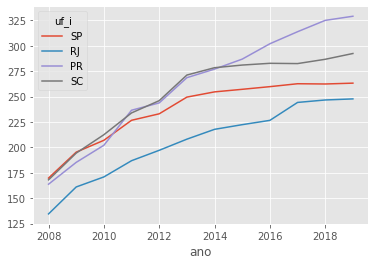

In [26]:
pserv_ahi[['SP', 'RJ', 'PR', 'SC']].plot()


In [27]:
ahi_mean_val = pd.read_csv('dados/AHI_val_medio.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
ahi_mean_val.columns = ahi_mean_val.columns.str.replace('/', '-')
ahi_mean_val = ahi_mean_val.rename(columns={'Unidade da Federação':'uf_code_and_name'})
ahi_mean_val[['uf_code', 'uf_name']] = ahi_mean_val['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
ahi_mean_val = ahi_mean_val.dropna(axis=1, how='any')
ahi_mean_val['uf'] = ahi_mean_val['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
ahi_mean_val['uf_i'] = ahi_mean_val['uf']
ahi_mean_val = ahi_mean_val.set_index('uf_i')
ahi_mean_val['2008-Jan'] = ahi_mean_val['2008-Fev']
ahi_mean_val_1 = ahi_mean_val.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
ahi_mean_val_t = ahi_mean_val_1.T.loc['2008-Jan':'2019-Dez', :].copy()
ahi_mean_val_t = ahi_mean_val_t.drop('Total', axis=1)
ahi_mean_val_t[['ano', 'mes']] = ahi_mean_val_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})
ahi_mean_val_t.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,SP,PR,SC,RS,MS,MT,GO,DF,ano,mes
2008-Jan,348.94,468.43,573.73,443.75,500.26,507.79,635.54,509.83,525.24,661.78,...,933.03,844.72,832.89,833.46,682.38,583.29,618.65,718.12,2008,Jan
2008-Fev,348.94,468.43,573.73,443.75,500.26,507.79,635.54,509.83,525.24,661.78,...,933.03,844.72,832.89,833.46,682.38,583.29,618.65,718.12,2008,Fev
2008-Mar,383.10,494.22,581.14,427.99,511.26,492.78,599.51,512.65,524.98,674.88,...,869.03,856.65,857.47,853.95,725.37,583.74,609.81,700.86,2008,Mar
2008-Abr,414.17,487.29,595.66,405.68,523.09,524.36,598.67,512.09,527.92,675.88,...,860.41,863.31,871.19,862.53,680.14,601.42,606.16,718.76,2008,Abr
2008-Mai,442.96,498.00,608.82,425.38,531.42,515.15,601.18,517.73,553.37,682.33,...,886.48,852.49,881.83,868.84,751.59,596.50,628.57,744.73,2008,Mai


<AxesSubplot:>

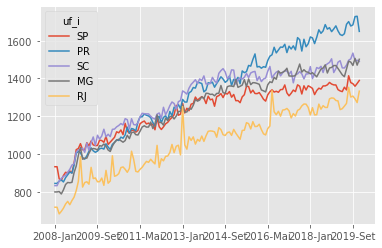

In [28]:
ahi_mean_val_t[['SP', 'PR', 'SC', 'MG', 'RJ']].plot()

In [29]:
ahi_mean_val = pd.read_csv('dados/internacao_val_med.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
ahi_mean_val.columns = ahi_mean_val.columns.str.replace('/', '-')
ahi_mean_val = ahi_mean_val.rename(columns={'Unidade da Federação':'uf_code_and_name'})
ahi_mean_val[['uf_code', 'uf_name']] = ahi_mean_val['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
ahi_mean_val = ahi_mean_val.dropna(axis=1, how='any')
ahi_mean_val['uf'] = ahi_mean_val['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
ahi_mean_val['uf_i'] = ahi_mean_val['uf']
ahi_mean_val = ahi_mean_val.set_index('uf_i')
ahi_mean_val['2008-Jan'] = ahi_mean_val['2008-Fev']
ahi_mean_val_1 = ahi_mean_val.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
ahi_mean_val_t = ahi_mean_val_1.T.loc['2008-Jan':'2019-Dez', :].copy()
ahi_mean_val_t = ahi_mean_val_t.drop('Total', axis=1)
ahi_mean_val_t[['ano', 'mes']] = ahi_mean_val_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})
ahi_mean_val_t.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,SP,PR,SC,RS,MS,MT,GO,DF,ano,mes
2008-Jan,348.94,468.43,573.81,443.75,500.34,507.79,643.89,520.46,527.92,672.42,...,"1,029.81",867.92,841.39,838.53,686.39,586.44,631.04,718.83,2008,Jan
2008-Fev,348.94,468.43,573.81,443.75,500.34,507.79,643.89,520.46,527.92,672.42,...,"1,029.81",867.92,841.39,838.53,686.39,586.44,631.04,718.83,2008,Fev
2008-Mar,383.10,494.22,581.18,427.99,511.84,492.78,607.35,519.82,528.30,685.68,...,906.48,878.43,866.71,859.08,731.05,587.94,621.97,701.49,2008,Mar
2008-Abr,414.17,487.29,595.66,405.68,523.91,524.36,607.72,519.00,530.96,685.53,...,901.36,885.54,882.89,867.80,685.58,606.63,617.65,718.84,2008,Abr
2008-Mai,442.96,498.00,609.23,425.38,531.50,515.15,610.73,525.63,555.03,694.02,...,925.03,874.59,894.23,874.35,757.67,602.40,643.34,745.01,2008,Mai


<AxesSubplot:xlabel='ano'>

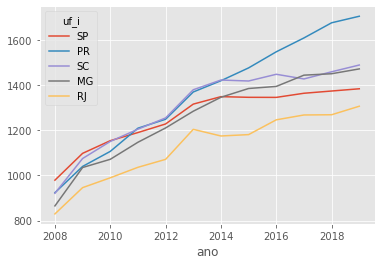

In [30]:
ahi_mean_val_t.groupby('ano')[['SP', 'PR', 'SC', 'MG', 'RJ']].mean().plot()